# Dataset

We have chosen to use a selection of datasets from the Open Data BCN portal (Barcelona).

These datasets were featured on kaggle at : https://www.kaggle.com/xvivancos/barcelona-data-sets .

These datasets are very clean and shouldn't require much data pre-processing, as can be seen by the score given on Kaggle : a usability score of 10/10. This score guarantees that : it is easy to understand, includes essential metadata, has rich, machine readable file formats and metadata and assures that the dataset is maintained.

# Problematic

The datasets feature both geographical and time series data about the population of Barcelona.
For example, we have access to the number of births, per year, and per neighborhood.

We would like to create some sort of interactive dashboard featuring each population metric (death rate, birth rate, number of accidents), and present them,either per district or per neighborhood using a map (think leaflet.js), and then allow the user to select a particular location (district or neighborhood), in order to show the time series data (think d3.js) of the metrics for the filtered location.

The motivation would to create a good representation of the city of Barcelona, per district, and per time range. It would be useful both for the administration of the city (knowing where accidents take place, where the life expectancy is the worst) to find where to help locally, and even for tourists, to know which neighborhoods to avoid.

In order to be more visual : here's a map of barcelona (taken from wikimedia) :

![Districts of Barcelona](300px-Barcelona_districtes.svg.png)


Our website would let you select a metric you would like shown on the map (using colors) either per district or per neighborhood, and clicking on a specific location would lead you to another view with more precise plots.

We would also provide a timeline (think d3.brush) in order for the user to select for which time range the user would like to see the results, and both the map, and the other plots would update accordingly.

# Exploratory Data Analysis

There are some entries for which no District or Neighborhood is known, so our only pre-processing (at least for now) is to get rid of those entries. In order to do that, we just remove entries which have a District code of 99.

Let's see some statistics about our datasets :

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df_population = pd.read_csv('data/population.csv')
df_births = pd.read_csv('data/births.csv')
df_deaths = pd.read_csv('data/deaths.csv')
df_accidents = pd.read_csv('data/accidents_2017.csv')
df_unemployment = pd.read_csv('data/unemployment.csv')

df_unemployment = df_unemployment[df_unemployment['District Code'] != 99]
df_births       = df_births[df_births['District Code'] != 99]

## Statistics about unemployment :

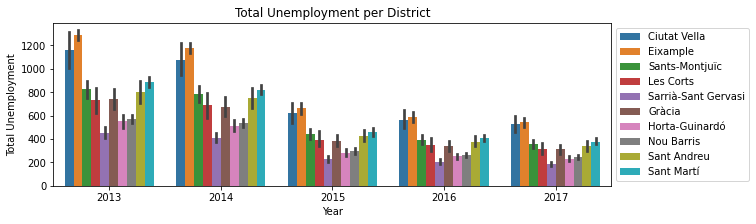

In [73]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_unemployment, x='Year', y='Number', hue='District Name')
plt.gca().set(ylabel='Total Unemployment', title='Total Unemployment per District')
plt.gca().legend(loc='best', bbox_to_anchor=(1, 1));

This gives us interesting information about the unemployment : we see that some districts struggle more about unemployment than others, but that in general, the unemployment rate has gone down, and the difference among districts has shrunk as well !

## Statistics about births :

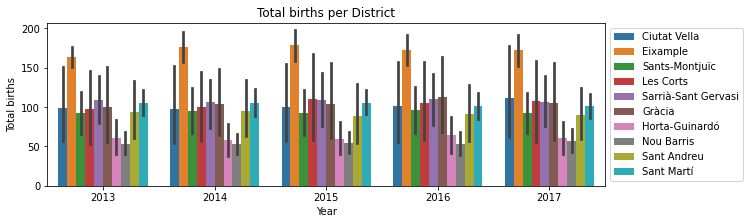

In [74]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_births, x='Year', y='Number', hue='District Name')
plt.gca().set(ylabel='Total births', title='Total births per District')
plt.gca().legend(loc='best', bbox_to_anchor=(1, 1));

In this plot, we see a high variance in the births per district due to our aggregation, and it would be interesting to see a "per-neighborhood" plot, which a map would enable us to do.

## Statistics about accidents :

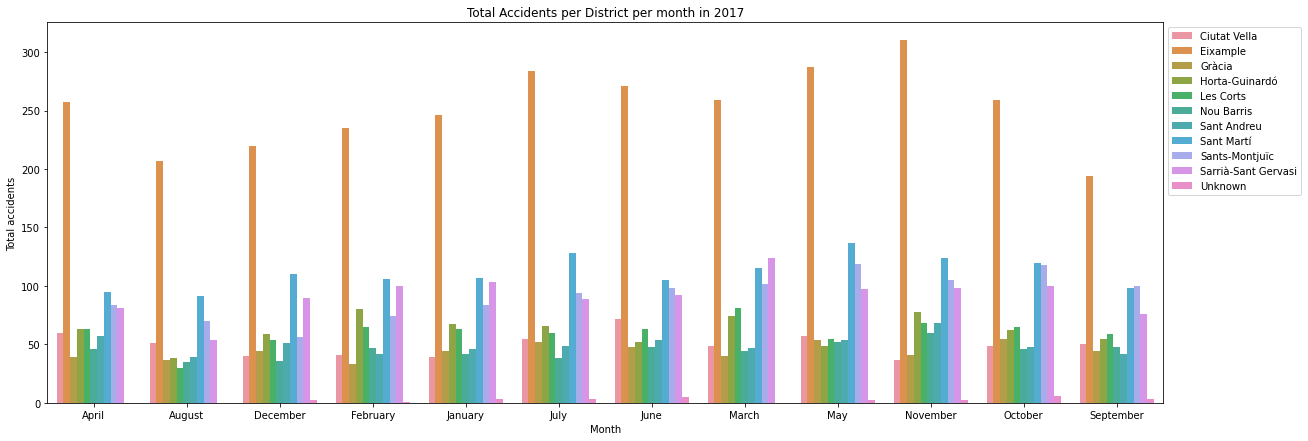

In [75]:
plt.figure(figsize=(20,7))

accidents_monthly = df_accidents.groupby(['Month', 'District Name']).count()['Id'].reset_index().rename(columns={'Id':'Total number'})
sns.barplot(data=accidents_monthly, x='Month', y='Total number', hue='District Name')
plt.gca().set(ylabel='Total accidents', title='Total Accidents per District per month in 2017')
plt.gca().legend(loc='best', bbox_to_anchor=(1, 1));

This plot is again interesting because it shows how much variance there is across districts, and in particular, this accidents dataset would be interesting to see on a map, as we have exact locations.

## Statistics about the population age :

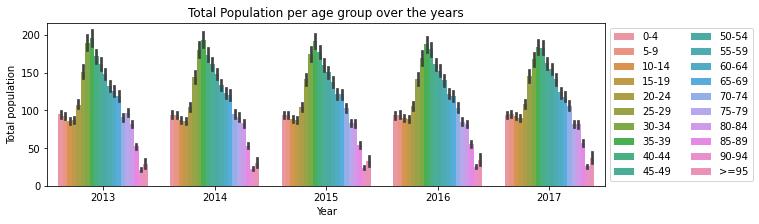

In [77]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_population, x='Year', y='Number', hue='Age')
plt.gca().set(ylabel='Total births', title='Total birth rate per District')
plt.gca().legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)
plt.gca().set(ylabel='Total population', title='Total Population per age group over the years');

All those statistics are very interesting, but the fact that they are simple 2D histograms are limiting our comprehension of the dataset : we have to aggregate the data more than we would like to. For example, showing at the same time the years, the age group, and the district at the same time is not really possible, which is why using a map to select relevant locations is something that we think would work great to help us visualize this dataset. (Although sometimes it's not important to see the change over the years, as we see from the relatively low change over the years in the population per age group).

# Related work

The closest (and most accomplished) related works are the following ones : 

- https://www.kaggle.com/xvivancos/discovering-barcelona-part-i
- https://www.kaggle.com/xvivancos/discovering-barcelona-part-ii

These analyses represent all the data in various plots but never use spatial visualization to really compare the districts to one-another. At some points in the notebooks, we see maps of the city and the different districts, but it is generally only to pinpoint locations (such as bus-stops for example, or accidents), but there is never a complete interactive map used .

This inspired us to represent the data on an interactive map where it would be possible to see the location of the different district and their data, allowing the user to filter by location.

The report also never really uses the neighborhood/district relation to decompose the data furthermore. This would be no problem on an interactive map as we can represent them like district.

Our approach is relatively original since we couldn't find any other visualization of the sort on the subject. We didn't really have any source of inspiration other than by looking at the dataset, and thinking that all the geographical information could be better harnessed by our method.

---
# Authors

- Boesinger Léopaul
- Marc Egli
- Louis Perrier